Read img04.tif.
Image size:  (768, 512)
Data type:  uint8


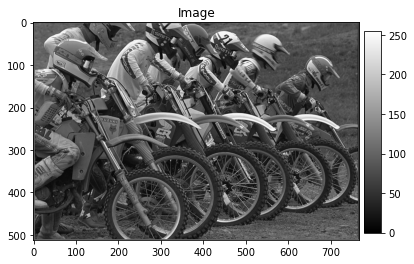

In [158]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jan 24 18:54:16 2021

@author: Wenrui Li
"""

import numpy as np                 # Numpy is a library support computation of large, multi-dimensional arrays and matrices.
from PIL import Image              # Python Imaging Library (abbreviated as PIL) is a free and open-source additional library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats.
import matplotlib.pyplot as plt    # Matplotlib is a plotting library for the Python programming language.

# Read in a gray scale TIFF image.
im = Image.open('img04g.tif')
print('Read img04.tif.')
print('Image size: ', im.size)

# Display image object by PIL.
im.show(title='image')

# Import Image Data into Numpy array.
# The matrix x contains a 2-D array of 8-bit gray scale values. 
x = np.array(im)
print('Data type: ', x.dtype)

# Display numpy array by matplotlib.
plt.imshow(x, cmap=plt.cm.gray)
plt.title('Image')

# Set colorbar location. [left, bottom, width, height].
cax =plt.axes([0.9, 0.15, 0.04, 0.7]) 
plt.colorbar(cax=cax)
plt.show()

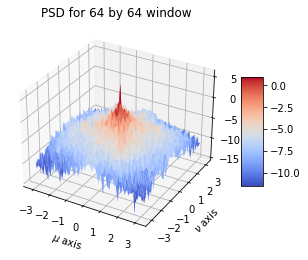

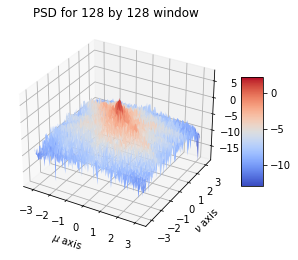

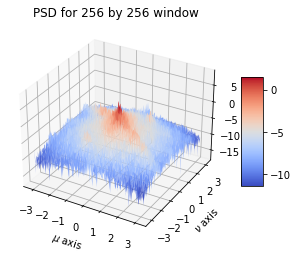

In [159]:
x = np.double(x)/255.0


i = 99
j = 99
N = [64, 128, 256]

for block_size in N:

    z = x[i:block_size+i, j:block_size+j]
    # Compute the power spectrum for the NxN region.
    Z = (1/block_size**2)*np.abs(np.fft.fft2(z))**2

    # Use fftshift to move the zero frequencies to the center of the plot.
    Z = np.fft.fftshift(Z)

    # Compute the logarithm of the Power Spectrum.
    Zabs = np.log(Z)

    # Plot the result using a 3-D mesh plot and label the x and y axises properly. 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    a = b = np.linspace(-np.pi, np.pi, num = block_size)
    X, Y = np.meshgrid(a, b)

    surf = ax.plot_surface(X, Y, Zabs, cmap=plt.cm.coolwarm)
    
    ax.set_title('PSD for ' + str(block_size) + ' by ' + str(block_size) +' window')
    ax.set_xlabel('$\mu$ axis')
    ax.set_ylabel('$\\nu$ axis')
    ax.set_zlabel('PSD')

    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()



In [160]:
def BetterSpecAnal(x):
    i = 95 #starting H when working outwards from windowing the middle of the img
    j = 224 #starting W when working outwards from windowing the middle of the img
    N = 64 #window size
    PSD_list = [] #empty list to store the results of all the PSDs we compute. We will need to take the avg later
    for m in range(5):
        if (m != 0):
            i = i + N
        for n in range(5):
            #print('i is', i, 'j is', j)
            z = x[i:N+i, j:N+j] * W
            # Compute the power spectrum for the NxN region.
            Z = (1/( W*(N**2)))*np.abs(np.fft.fft2(z))**2

            # Use fftshift to move the zero frequencies to the center of the plot.
            Z = np.fft.fftshift(Z)

            # Compute the logarithm of the Power Spectrum.
            Zabs = np.log(Z)
            PSD_list.append(Zabs)
            j = j + N
            if (n == 4): #go back to the left side of the image so windowing starts from there for the 
                #next lower height
                j = 224

    sum = 0            
    for i in PSD_list: #sum up all the PSDs from the different windows
        sum = sum + i

    Zabs_avg = sum / 25 #take average of all the PSDs
    return Zabs_avg

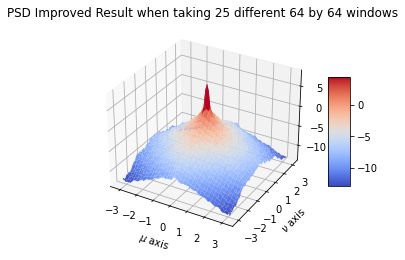

In [161]:
N = 64
PSD_result = BetterSpecAnal(x)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.linspace(-np.pi, np.pi, num = N)
X, Y = np.meshgrid(a, b)

surf = ax.plot_surface(X, Y, PSD_result, cmap=plt.cm.coolwarm)

ax.set_xlabel('$\mu$ axis')
ax.set_ylabel('$\\nu$ axis')
ax.set_zlabel('Z Label')
ax.set_title('PSD Improved Result when taking 25 different 64 by 64 windows')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

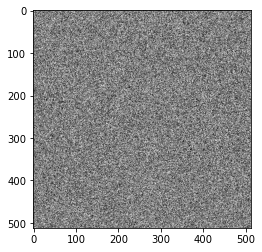

In [162]:
#Part 2 - PSD of a 2D AR Process
x = np.random.uniform(low = -0.5, high = 0.5, size = (512,512))
x_scaled = 255 * (x + 0.5)
x_scaled = x_scaled.astype(np.uint8) #convert to integers between 0-255
plt.imshow(x_scaled, cmap=plt.cm.gray)

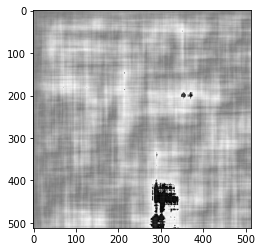

In [163]:
y = np.zeros((512,512))
for i in range(x_scaled.shape[0]):
    for j in range(x_scaled.shape[1]):
        #print('i is', i, 'j is', j)
        if (i == 0 and j == 0):
            y[i,j] = 3*x[i,j]
            #print('y[i,j]', y[i,j])
        if (i == 0 and j > 0):
            y[i,j] = 3*x[i,j] + 0.99*y[i, j-1]
            #print('y[i,j]', y[i,j])
        if (i > 0 and j == 0):
            y[i,j] = 3*x[i,j] + 0.99*y[i-1, j]
            #print('y[i,j]', y[i,j])
        if (i > 0 and j > 0):
            y[i,j] = 3*x[i,j] + (0.99*y[i-1, j]) + (0.99*y[i, j-1]) - (0.9801 * y[i-1,j-1])
            #print('y[i,j]', y[i,j])
        if y[i,j] > 255:
            y[i, j] = 0
        if y[i,j] < 0:
            y[i,j] = 0

plt.imshow((y + 127).astype(np.uint8), cmap=plt.cm.gray)

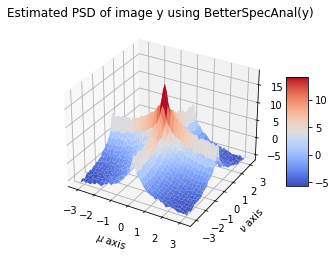

In [164]:
#PSD of y
#update BetterSpecAnal function definition so it works with the dimensions of image y

def BetterSpecAnal(x):
    i = 95 
    j = 95 # updated this from 224
    N = 64
    PSD_list = []
    for m in range(5):
        if (m != 0):
            i = i + N
            #print('i is', i)
        for n in range(5):
            #print('i is', i, 'j is', j)
            z = x[i:N+i, j:N+j] * W
            # Compute the power spectrum for the NxN region.
            Z = (1/( W*(N**2)))*np.abs(np.fft.fft2(z))**2

            # Use fftshift to move the zero frequencies to the center of the plot.
            Z = np.fft.fftshift(Z)

            # Compute the logarithm of the Power Spectrum.
            Zabs = np.log(Z)
            PSD_list.append(Zabs)
            j = j + N
            if (n == 4):
                j = 95

    sum = 0            
    for i in PSD_list: 
        sum = sum + i

    Zabs_avg = sum / 25 #take average of all the PSDs
    return Zabs_avg

PSD_y = BetterSpecAnal(y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.linspace(-np.pi, np.pi, num = N)
X, Y = np.meshgrid(a, b)

surf = ax.plot_surface(X, Y, PSD_y, cmap=plt.cm.coolwarm)

ax.set_xlabel('$\mu$ axis')
ax.set_ylabel('$\\nu$ axis')
ax.set_zlabel('Z Label')
ax.set_title('Estimated PSD of image y using BetterSpecAnal(y)')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

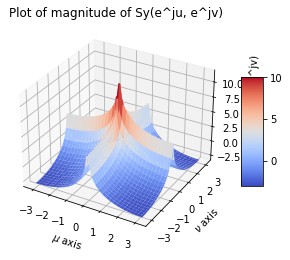

In [166]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm



a = b = np.linspace(-np.pi, np.pi, num = N)
X, Y = np.meshgrid(a, b)

def H_mag(u, v):
    return (np.abs(3 / (1 - 0.99 * np.exp(-1j * u) - 0.99* np.exp(-1j * v) + 0.9801*np.exp(-1j * (u + v)))))**2 * (1/12)


X, Y = np.meshgrid(a, b) 
PSD_theoretical = H_mag(X, Y)
PSD_theoretical = np.log(PSD_theoretical)

fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, PSD_theoretical, cmap=plt.cm.coolwarm)
ax.set_xlabel('$\mu$ axis')
ax.set_ylabel('$\\nu$ axis')
ax.set_zlabel('Logged Sy(e^ju, e^jv)')
ax.set_title('Plot of magnitude of Sy(e^ju, e^jv)')

fig.colorbar(surf, shrink=0.5, aspect=5)